In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('libraries imported')

libraries imported


In [2]:
# Import the data set
import types

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_aa0682dac2ea46708a76c09ecac60e99 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OQ7E-F2EpeAr2rMGAtJtZWmzVBrRQ0ePT4o3uNqhMC6g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_aa0682dac2ea46708a76c09ecac60e99.get_object(Bucket='spotify-donotdelete-pr-riayigqj1y9rsh',Key='Spotify Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

In [3]:
# Convert release_date feature from object to date time
df['release_date'] = pd.to_datetime(df['release_date'])

# Create a new column based solely on the year of the new date time
df['year'] = df['release_date'].dt.year

# Drop old release_date column
df = df.drop(columns = 'release_date', axis = 1, inplace = False)

# Drop the id column
df = df.drop(columns = 'id', axis = 1, inplace = False)

# Convert duration_ms to duration_s
df['duration'] = round(df['duration_ms']/(1000),2)

# Drop old duration_ms column
df = df.drop(columns = 'duration_ms', axis = 1, inplace = False)

# View the first five rows of the data set after all the edits
df.head()

acousticness                    artists  danceability  energy  explicit  \
0      0.991000            ['Mamie Smith']         0.598   0.224         0   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852   0.517         0   
2      0.993000            ['Mamie Smith']         0.647   0.186         0   
3      0.000173        ['Oscar Velazquez']         0.730   0.798         0   
4      0.295000                   ['Mixe']         0.704   0.707         1   

   instrumentalness  key  liveness  loudness  mode  \
0          0.000522    5    0.3790   -12.628     0   
1          0.026400    5    0.0809    -7.261     0   
2          0.000018    0    0.5190   -12.098     1   
3          0.801000    2    0.1280    -7.311     1   
4          0.000246   10    0.4020    -6.036     0   

                                                name  popularity  speechiness  \
0                           Keep A Song In Your Soul          12       0.0936   
1                               I Put A Spell On You           7       0.0534   
2                                       Golfing Papa           4       0.1740   
3  True House Music - Xavier Santos & Carlos Gomi...          17       0.0425   
4                                          Xuniverxe           2       0.0768   

     tempo  valence  year  duration  
0  149.976   0.6340  1920    168.33  
1   86.889   0.9500  1920    150.20  
2   97.600   0.6890  1920    163.83  
3  127.997   0.0422  1920    422.09  
4  122.076   0.2990  1920    165.22

## Bivariate Analysis

In this section we will discuss the relationship between different features. The main focus is how other variables will impact popularity. This will pave a way for the next notebook in this project that will use these features and predict the popularity level of a song. 

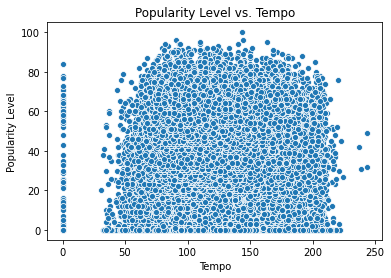

In [4]:
# Graphically examine the relationship between Tempo and popularity
ax = sns.scatterplot(data = df, x = 'tempo', y = 'popularity')
ax.set(xlabel = 'Tempo', ylabel = 'Popularity Level', title = 'Popularity Level vs. Tempo')
plt.show()

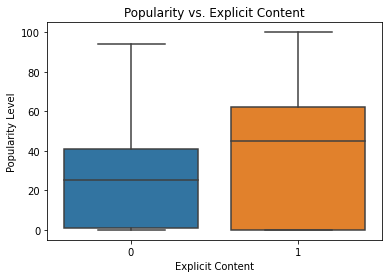

In [5]:
# Graphically examine the relationship between popularity and explicit
ax = sns.boxplot(data = df, x = 'explicit', y = 'popularity')
ax.set(xlabel = 'Explicit Content', ylabel = 'Popularity Level', title = 'Popularity vs. Explicit Content')
plt.show()

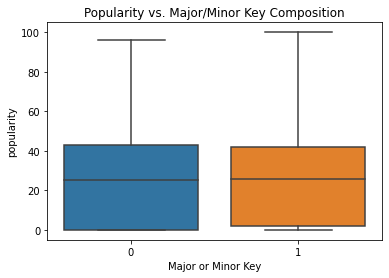

In [6]:
# Graphically examine the relationship between mode and popularity
ax = sns.boxplot(data = df, x = 'mode', y = 'popularity')
ax.set(xlabel = 'Major or Minor Key', ylabel = 'popularity', title = 'Popularity vs. Major/Minor Key Composition')
plt.show()

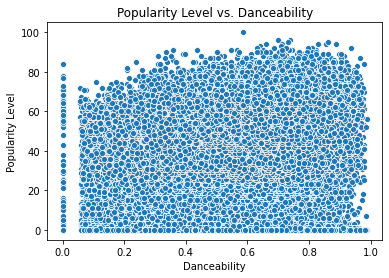

In [7]:
# Graphically examine the relationship between danceability and popularity
ax = sns.scatterplot(data = df, x = 'danceability', y = 'popularity')
ax.set(xlabel = 'Danceability', ylabel = 'Popularity Level', title = 'Popularity Level vs. Danceability')
plt.show()

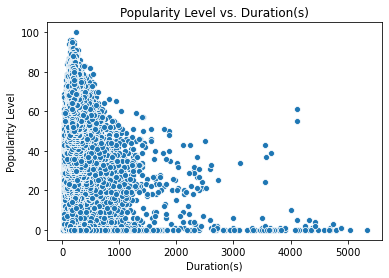

In [8]:
# Graphically examine the relationship between duration(s) and popularity
ax = sns.scatterplot(data = df, x = 'duration', y = 'popularity')
ax.set(xlabel = 'Duration(s)', ylabel = 'Popularity Level', title = 'Popularity Level vs. Duration(s)')
plt.show()

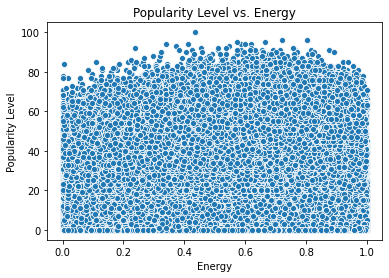

In [9]:
# Graphically examine the relationship between energy and popularity
ax = sns.scatterplot(data = df, x = 'energy', y = 'popularity')
ax.set(xlabel = 'Energy', ylabel = 'Popularity Level', title = 'Popularity Level vs. Energy')
plt.show()

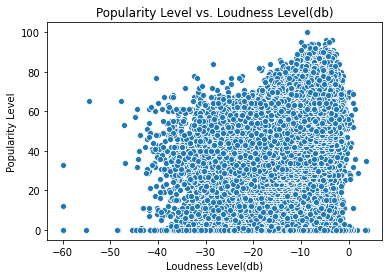

In [10]:
# Graphically examine the relationship between loudness and popularity
ax = sns.scatterplot(data = df, x = 'loudness', y = 'popularity')
ax.set(xlabel = 'Loudness Level(db)', ylabel = 'Popularity Level', title = 'Popularity Level vs. Loudness Level(db)')
plt.show()

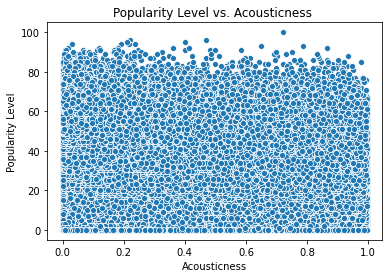

In [11]:
# Graphically examine the relationship between acousticness and popularity
ax = sns.scatterplot(data = df, x = 'acousticness', y = 'popularity')
ax.set(xlabel = 'Acousticness', ylabel = 'Popularity Level', title = 'Popularity Level vs. Acousticness ')
plt.show()

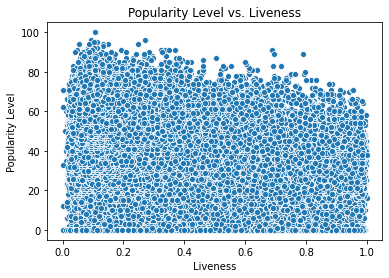

In [12]:
# Graphically examine the relationship between liveness and popularity
ax = sns.scatterplot(data = df, x = 'liveness', y = 'popularity')
ax.set(xlabel = 'Liveness', ylabel = 'Popularity Level', title = 'Popularity Level vs. Liveness')
plt.show()

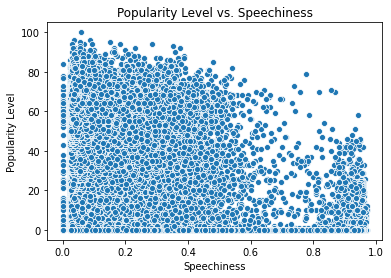

In [13]:
# Graphically examine the relationship between speechiness and popularity
ax = sns.scatterplot(data = df, x = 'speechiness', y = 'popularity')
ax.set(xlabel = 'Speechiness', ylabel = 'Popularity Level', title = 'Popularity Level vs. Speechiness')
plt.show()

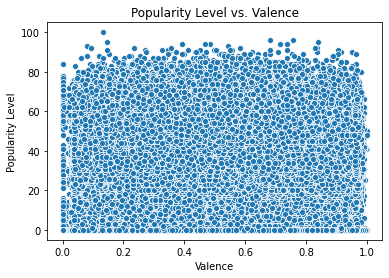

In [14]:
# Graphically examine the relationship between valence and popularity
ax = sns.scatterplot(data = df, x = 'valence', y = 'popularity')
ax.set(xlabel = 'Valence', ylabel = 'Popularity Level', title = 'Popularity Level vs. Valence')
plt.show()

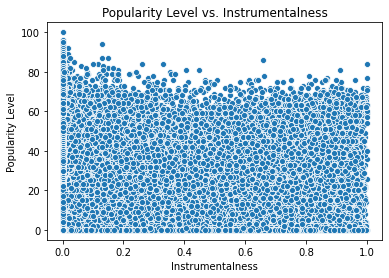

In [15]:
# Graphically examine the relationship between instrumentalness and popularity
ax = sns.scatterplot(data = df, x = 'instrumentalness', y = 'popularity')
ax.set(xlabel = 'Instrumentalness', ylabel = 'Popularity Level', title = 'Popularity Level vs. Instrumentalness')
plt.show()

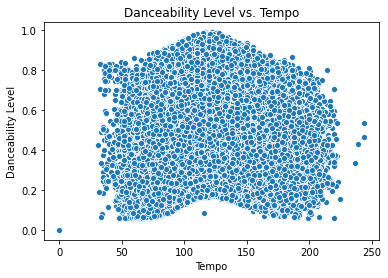

In [16]:
# Graphically examine the relationship between tempo and danceability
ax = sns.scatterplot(data = df, x = 'tempo', y = 'danceability')
ax.set(xlabel = 'Tempo', ylabel = 'Danceability Level', title = 'Danceability Level vs. Tempo')
plt.show()

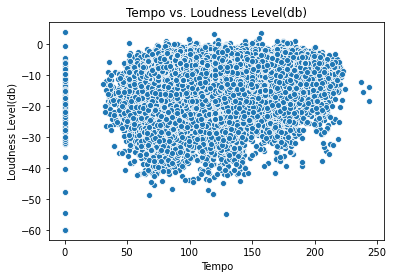

In [17]:
# Graphically examine the relationship between tempo and loudness
ax = sns.scatterplot(data = df, x = 'tempo', y = 'loudness')
ax.set(xlabel = 'Tempo', ylabel = 'Loudness Level(db)', title = 'Tempo vs. Loudness Level(db)')
plt.show()

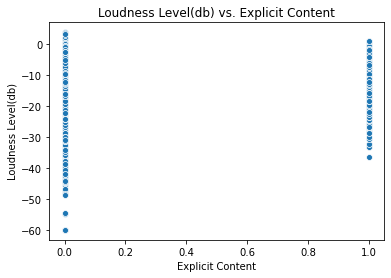

In [18]:
# Graphically examine the relationship between explicit and loudness
ax = sns.scatterplot(data = df, x = 'explicit', y = 'loudness')
ax.set(xlabel = 'Explicit Content', ylabel = 'Loudness Level(db)', title = 'Loudness Level(db) vs. Explicit Content')
plt.show()

In [19]:
# Graphically examine the popularity of songs in each octave key C, C#, ...
df_keys = df.copy()
keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
for index in range(len(df)):
    for key_index in range(len(keys)):
        if df['key'][index] == key_index:
            df_keys['key'][index] = keys[key_index]
            
fig = px.box(df_keys, x = df_keys.key, y = df_keys.popularity, title = 'Popularity of Songs in Each Key', color_discrete_sequence = ['darkorange'],category_orders = {
    'key': ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']})
fig.show()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


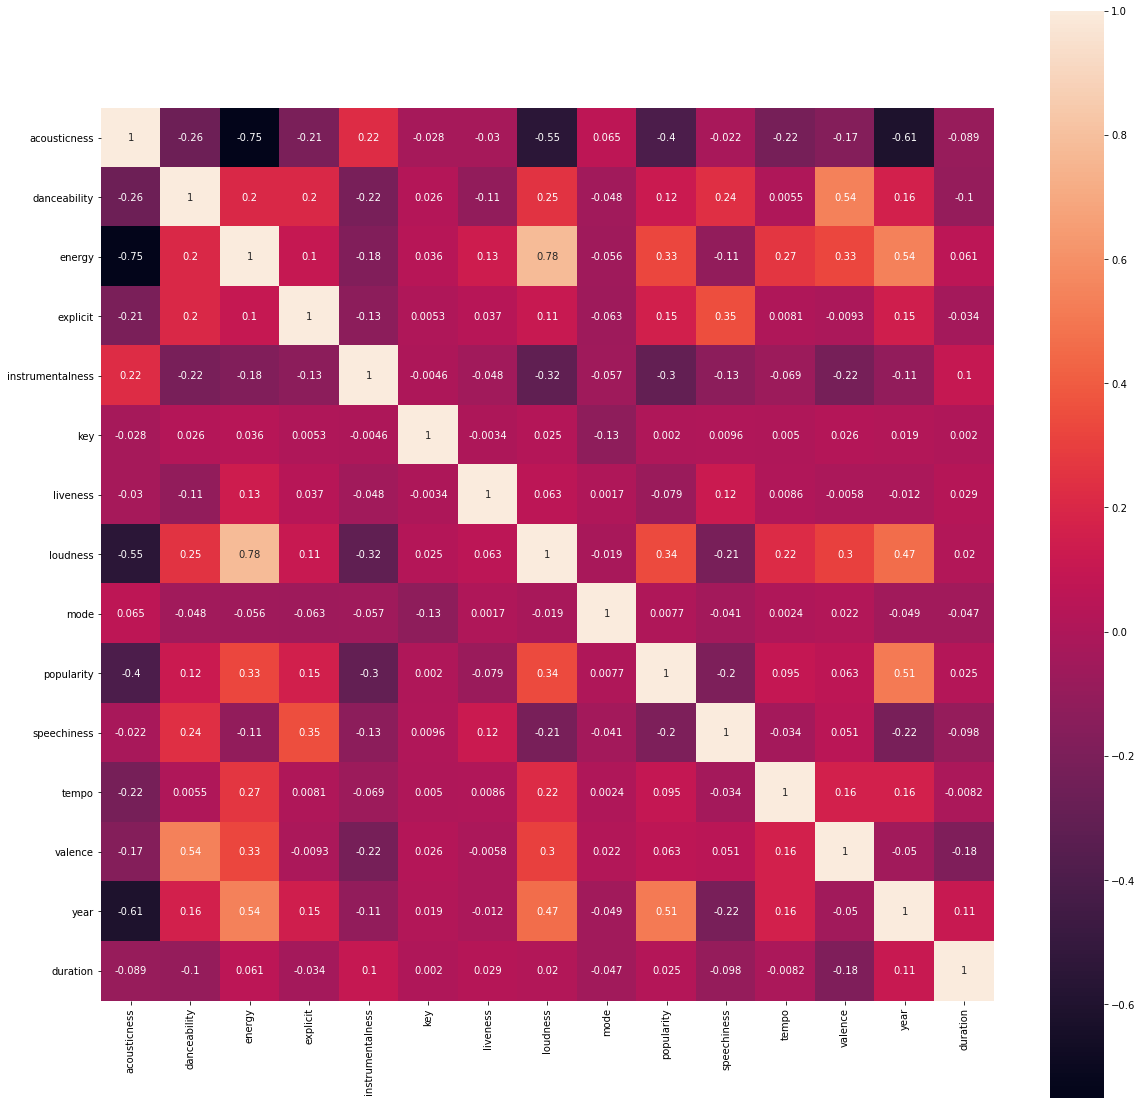

In [20]:
# Display heatmap to show correlation between variables
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, square = True)
plt.show()

## Conclusions from Bivariate Data Analysis
When it comes down to popularity, we can see from the above heatmap that most of our features have some impact on it based on their correlation values. Some insights on the features and popularity are as follows:
- **Tempo vs. Popularity** : Songs that are between 60 and 200 bpm are more popular
- **Explicit vs. Popularity** : Explicit songs have a tendency to be more popular than songs with no explicit content
- **Mode vs. Popularity** : There doesn't seem to be much difference between songs composed in a major key or a minor key when compared to popularity
- **Danceability vs. Popularity** : More popular songs have a tendency to have a higher danceability
- **Duration(s) vs. Popularity** : The more popular songs seem to have a duration of 120 to 300 seconds
- **Energy vs. Popularity** : As the energy level ranges from 0.5 to 1 the songs tend to increase in popularity
- **Loudness(db) vs. Popularity** : The more popular the song the more likely it is to fall within the decible range of -20 to 0db
- **Acousticness vs. Popularity** : Songs that have a higher popularity level have a tendency to fall within the range of 0 to 0.4 on the acousticness scale
- **Liveness vs. Popularity** : The more popular songs have values within the range 0 and 0.4
- **Speechiness vs. Popularity** : Songs that rank higher regarding their popularity level have a lower speechiness value
- **Valence vs. Popularity** : Regarding the distribution of popularity and valence it seems to be approximately uniform throughout
- **Instrumentalness vs. Popularity** : The more popular a song is the less its instrumentalness value
- **Key vs. Popularity** : It seems to be that the more popular keys to compose a song in are C#, G, and A#
- **Tempo vs. Danceability** : According to the scatterplot it seems that songs with a tempo of 125bpm have a higher level of danceability
- **Tempo vs. Loudness(db)** : There doesn't seem to be a correlation between tempo and loudness(db). 
- **Explicit vs. Loudness(db)** : Although there are less songs with explicit content it, the lower end for explicit is towards the midrange of loudness(db) for nonexplicit songs

In [21]:
# Find the most popular songs on Spotify
popularity = df.copy().sort_values(by = ['popularity'], ascending = False)[['popularity','name','artists']]
popularity.head(10)

popularity                    name                       artists
20062         100         drivers license            ['Olivia Rodrigo']
19862          96  Mood (feat. iann dior)     ['24kGoldn', 'iann dior']
19866          96               positions             ['Ariana Grande']
19886          95                  DÁKITI  ['Bad Bunny', 'Jhay Cortez']
19976          95                 BICHOTA                   ['KAROL G']
19868          94                   34+35             ['Ariana Grande']
19870          94                 Whoopty                        ['CJ']
19872          94             WITHOUT YOU             ['The Kid LAROI']
19876          94          Therefore I Am             ['Billie Eilish']
19928          94      LA NOCHE DE ANOCHE      ['Bad Bunny', 'ROSALÍA']

The top ten most popular songs are: *Drivers License*, *Mood*, *Positions*, *DAKITI*, *BICHOTA*, *34+35*, *Whoopty*, *Without You*, *Therefore I Am*, and *La Noche De Anoche*

In [22]:
# Find the most popular songs on Spotify from 2018 to 2020
df_pop = df[df.popularity > 90]
df_pop.head(10)

acousticness                              artists  danceability  \
19470         0.483                              ['Sia']         0.716   
19670         0.122                     ['Harry Styles']         0.548   
19862         0.221            ['24kGoldn', 'iann dior']         0.700   
19864         0.499                              ['SZA']         0.436   
19866         0.468                    ['Ariana Grande']         0.737   
19868         0.237                    ['Ariana Grande']         0.830   
19870         0.190                               ['CJ']         0.711   
19872         0.213                    ['The Kid LAROI']         0.662   
19874         0.114  ['Pop Smoke', 'Lil Baby', 'DaBaby']         0.823   
19876         0.218                    ['Billie Eilish']         0.889   

       energy  explicit  instrumentalness  key  liveness  loudness  mode  \
19470   0.512         0          0.000000    1    0.0928    -6.257     1   
19670   0.816         0          0.000000    0    0.3350    -4.209     1   
19862   0.722         1          0.000000    7    0.2720    -3.558     0   
19864   0.655         1          0.000008    1    0.6880    -8.370     0   
19866   0.802         1          0.000000    0    0.0931    -4.771     1   
19868   0.585         1          0.000000    0    0.2480    -6.476     1   
19870   0.598         1          0.000000    3    0.1500    -7.621     0   
19872   0.413         1          0.000000    0    0.1340    -7.357     1   
19874   0.586         1          0.000000    6    0.1930    -6.606     0   
19876   0.340         0          0.130000   11    0.0550    -7.773     0   

                                          name  popularity  speechiness  \
19470                                  Snowman          91       0.0331   
19670                         Watermelon Sugar          91       0.0465   
19862                   Mood (feat. iann dior)          96       0.0369   
19864                                Good Days          91       0.0583   
19866                                positions          96       0.0878   
19868                                    34+35          94       0.0940   
19870                                  Whoopty          94       0.1820   
19872                              WITHOUT YOU          94       0.0299   
19874  For The Night (feat. Lil Baby & DaBaby)          91       0.2000   
19876                           Therefore I Am          94       0.0697   

         tempo  valence  year  duration  
19470  104.957    0.326  2018    165.91  
19670   95.390    0.557  2019    174.00  
19862   90.989    0.756  2020    140.53  
19864  121.002    0.412  2020    279.20  
19866  144.015    0.682  2020    172.32  
19868  109.978    0.485  2020    173.71  
19870  140.175    0.737  2020    123.43  
19872   93.005    0.467  2020    161.38  
19874  125.971    0.347  2020    190.48  
19876   94.009    0.716  2020    174.32

The most popular song for 2018 was *Snowman* by Sia. The most popular song for 2019 was *Watermelon Sugar* by Harry Styles. Finally the most popular song in 2020 was a tie between *Mood* by 24kGoldn and *Positions* by Ariana Grande

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

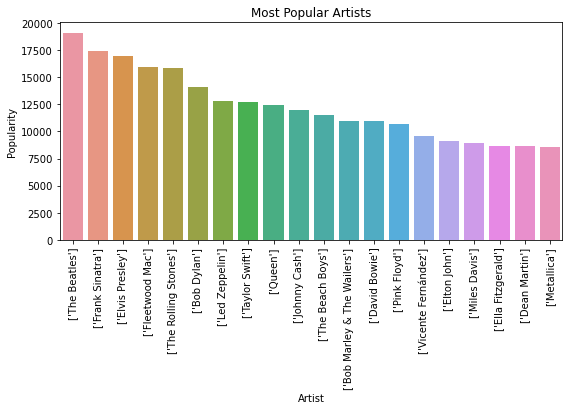

In [23]:
# Who are the most popular artists on Spotify?
plt.figure(figsize=(9, 4))
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set(xlabel = 'Artist', ylabel = 'Popularity', title = 'Most Popular Artists')
plt.xticks(rotation = 90)

According to the graph The Beatles were the most popular artist on Spotify with the highest total popularity rating, followed by Frank Sinatra, Elivs Presley, and Fleetwood Mac

## Conclusion
Overall there is always more data analysis to perform. One thing we could do is merge this data set with another dataset that contains the genre of each song. We can then perform more analysis to see which genre is the most popular, how many songs are categorized by each genre, and of course visualize these using any of the graphical visualization libraries in python. The analysis of this data set provided a lot of insights into Spotify's song collection. The next notebook in this series will focus in on building a recommender system for the aritsts on Spotify. Utilizing that we can investigate how well Spotify is able to recommend songs and artists based on a wide variety of features. 